<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/MIP231023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("remotes")
install.packages("directlabels")
install.packages("gridExtra")
remotes::install_github("tskmr/statds")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse); library(statds); library(grid);
library(directlabels); library(scales)
theme_set(mytheme_bw(36)+
            theme(axis.title.x = element_text(family = "serif"),
                  axis.title.y = element_text(family = "serif")))

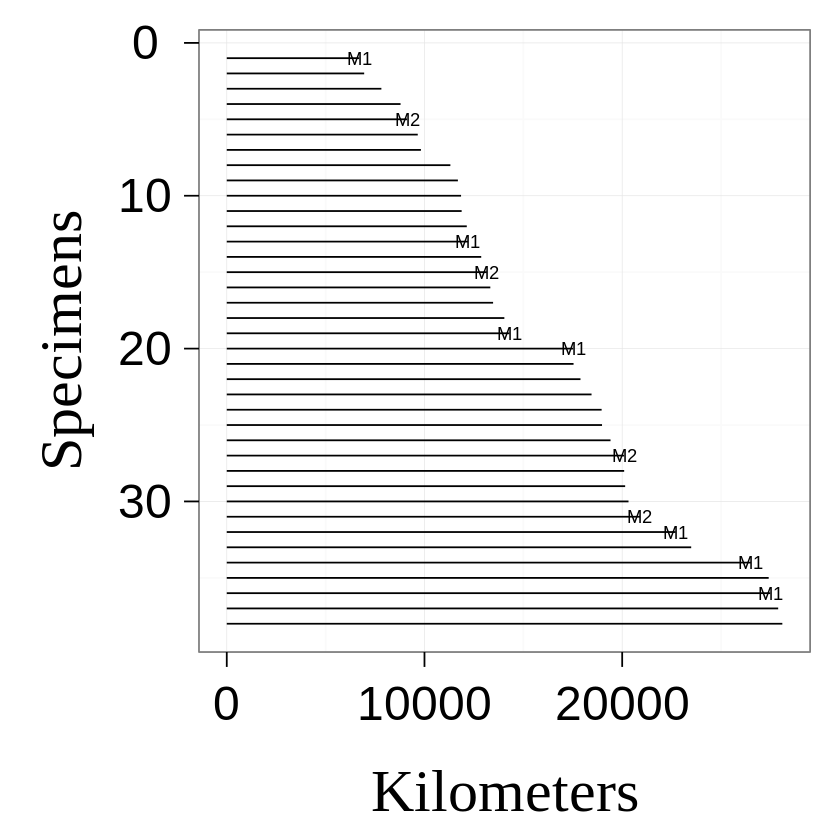

In [ ]:
########################################################
# source("data.R") # see p.59
distance = statds::shock.absorbers$Distance
mode = statds::shock.absorbers$Failure.Mode

data.frame(t=distance, mode) %>%
  mutate(i = seq_along(t)) %>%
  ggplot(aes(0, i))+
  geom_segment(aes(xend=t, yend=i))+
  geom_text(aes(x=t, label=mode))+
  xlab("Kilometers")+ylab("Specimens")+
  scale_y_reverse()
# ggsave("shock_absorber_1_failure.pdf", width=sw, height=sh)


In [ ]:
distance

[1]  6700  6950  7820  8790  9120  9660  9820 11310 11690 11850 11880 12140
[13] 12200 12870 13150 13330 13470 14040 14300 17520 17540 17890 18450 18960
[25] 18980 19410 20100 20100 20150 20320 20900 22700 23490 26510 27410 27490
[37] 27890 28100

In [ ]:
data.frame(t=distance, mode, nj=rev(seq_along(distance)))


t,mode,nj
<dbl>,<fct>,<int>
6700,M1,38
6950,,37
7820,,36
8790,,35
9120,M2,34
9660,,33
9820,,32
11310,,31
11690,,30


In [ ]:
########################################################
d = data.frame(t=distance, nj=rev(seq_along(distance)))
d = d[which(mode%in%c("M1", "M2")), ]
d

d$t
d$nj

,t,nj
,<dbl>,<int>
1,6700,38
5,9120,34
13,12200,26
15,13150,24
19,14300,20
20,17520,19
27,20100,12
31,20900,8
32,22700,7


[1]  6700  9120 12200 13150 14300 17520 20100 20900 22700 26510 27490

[1] 38 34 26 24 20 19 12  8  7  5  3

In [ ]:
p = 1/d$nj
p

[1] 0.02631579 0.02941176 0.03846154 0.04166667 0.05000000 0.05263158
 [7] 0.08333333 0.12500000 0.14285714 0.20000000 0.33333333

In [ ]:
q = 1-p
q

[1] 0.9736842 0.9705882 0.9615385 0.9583333 0.9500000 0.9473684 0.9166667
 [8] 0.8750000 0.8571429 0.8000000 0.6666667

In [ ]:
estSF = ### write your answer ###
  # q[1], q[1]*q[2], q[1]q[2]q[3], ...
  cumprod(q)
estSF

[1] 0.9736842 0.9450464 0.9086985 0.8708361 0.8272943 0.7837525 0.7184398
 [8] 0.6286348 0.5388298 0.4310639 0.2873759

In [ ]:
q[1]*q[2]*q[3]

[1] 0.9086985

In [ ]:
estCDF = ### write your answer ###
  1-estSF
estCDF

[1] 0.02631579 0.05495356 0.09130150 0.12916394 0.17270574 0.21624754
 [7] 0.28156025 0.37136522 0.46117019 0.56893615 0.71262410

,t,nj,p,q,estSF,estCDF
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,6700,38,0.02631579,0.9736842,0.9736842,0.02631579
5,9120,34,0.02941176,0.9705882,0.9450464,0.05495356
13,12200,26,0.03846154,0.9615385,0.9086985,0.09130150
15,13150,24,0.04166667,0.9583333,0.8708361,0.12916394
19,14300,20,0.05000000,0.9500000,0.8272943,0.17270574
20,17520,19,0.05263158,0.9473684,0.7837525,0.21624754
27,20100,12,0.08333333,0.9166667,0.7184398,0.28156025
31,20900,8,0.12500000,0.8750000,0.6286348,0.37136522
32,22700,7,0.14285714,0.8571429,0.5388298,0.46117019


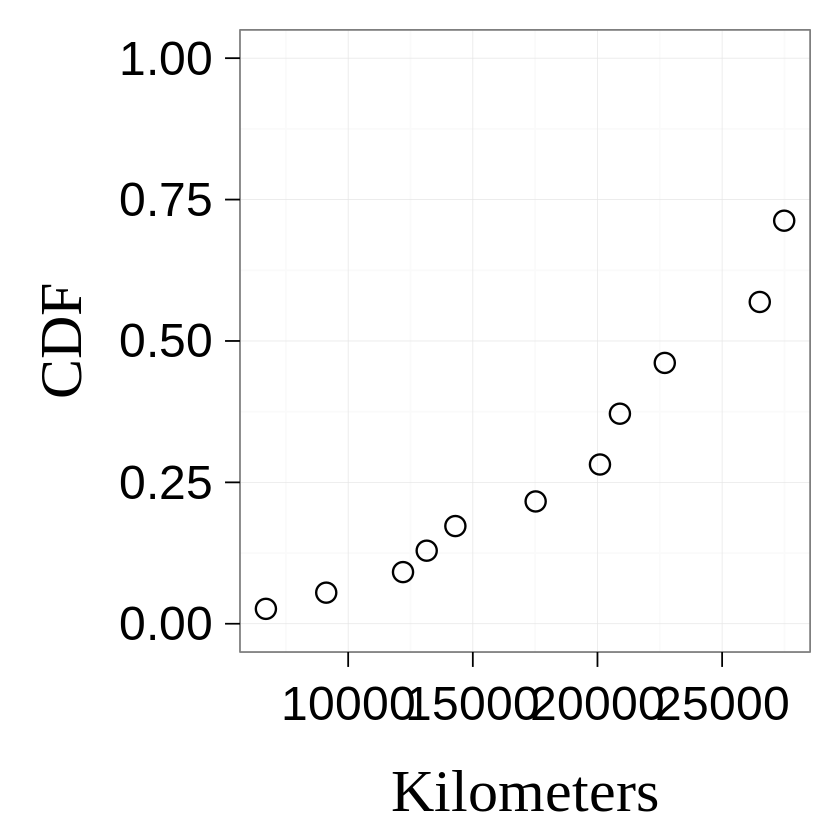

In [ ]:
d = d %>% mutate(p, q, estSF, estCDF)
d

pl = d %>%
  ggplot()+
  geom_pointj(aes(x=t, y=estCDF), size=5)+
  ylim(c(0,1))+
  xlab("Kilometers")+ylab(quote(CDF))
pl
# ggsave("shock_absorbers_2_KMplot.pdf", width=sw, height=sh)


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


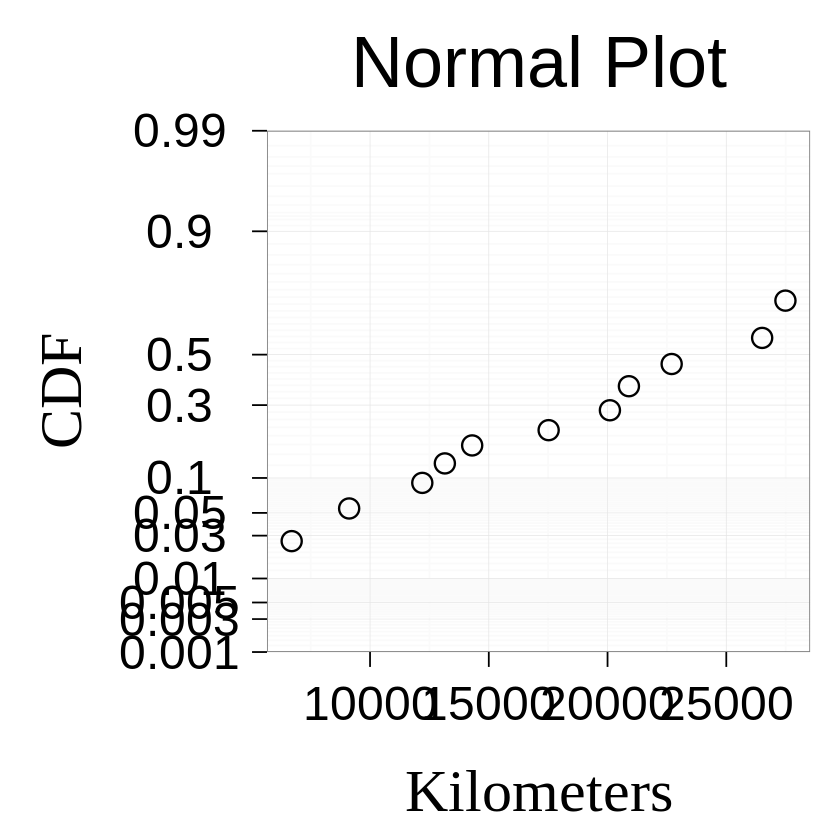

In [21]:
##################################################################3
p.normal = pl + ggtitle("Normal Plot") + ### write your answer ###
  scale_y_normal()
p.normal
#ggsave("shock_absorbers_pp_normalplot.pdf", p.normal, width=silver.w, height=silver.h)


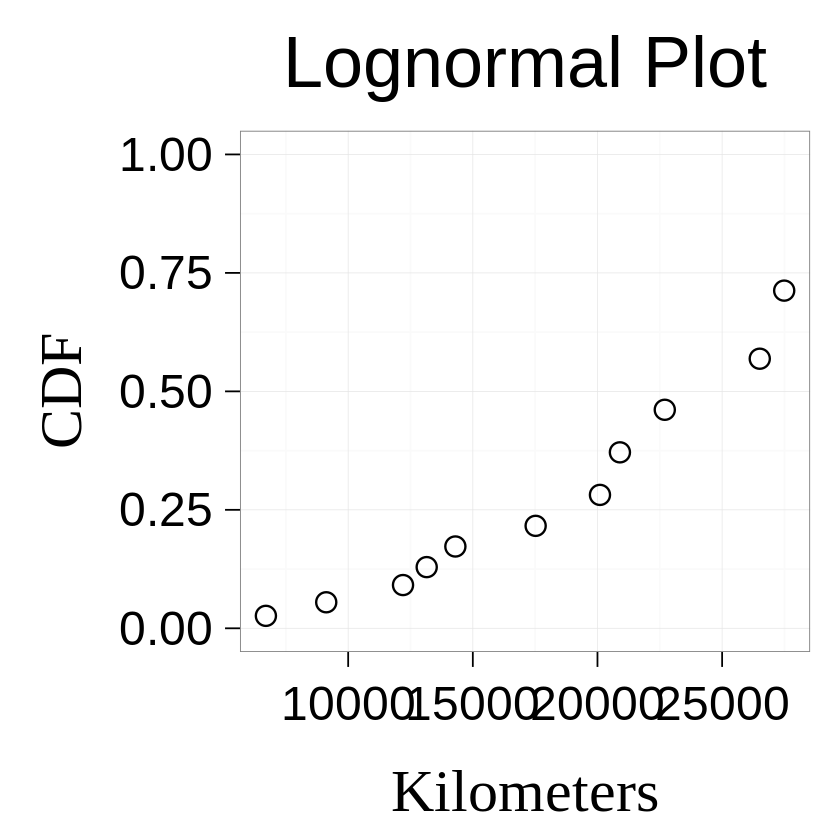

In [22]:
p.lognormal = pl + ggtitle("Lognormal Plot") ### write your answer ###
p.lognormal
# ggsave("shock_absorbers_pp_lognormalplot.pdf", p.lognormal, width=silver.w, height=silver.h)


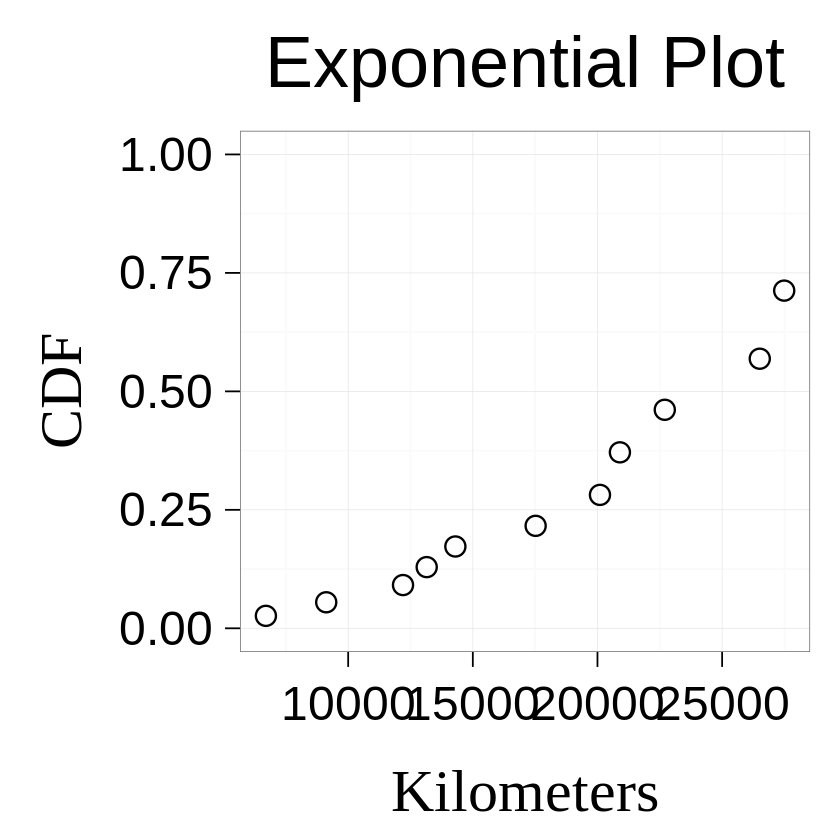

In [23]:
p.exp = pl + ggtitle("Exponential Plot") ### write your answer ###
p.exp
# ggsave("shock_absorbers_pp_exponentialplot.pdf", p.exp, width=silver.w, height=silver.h)


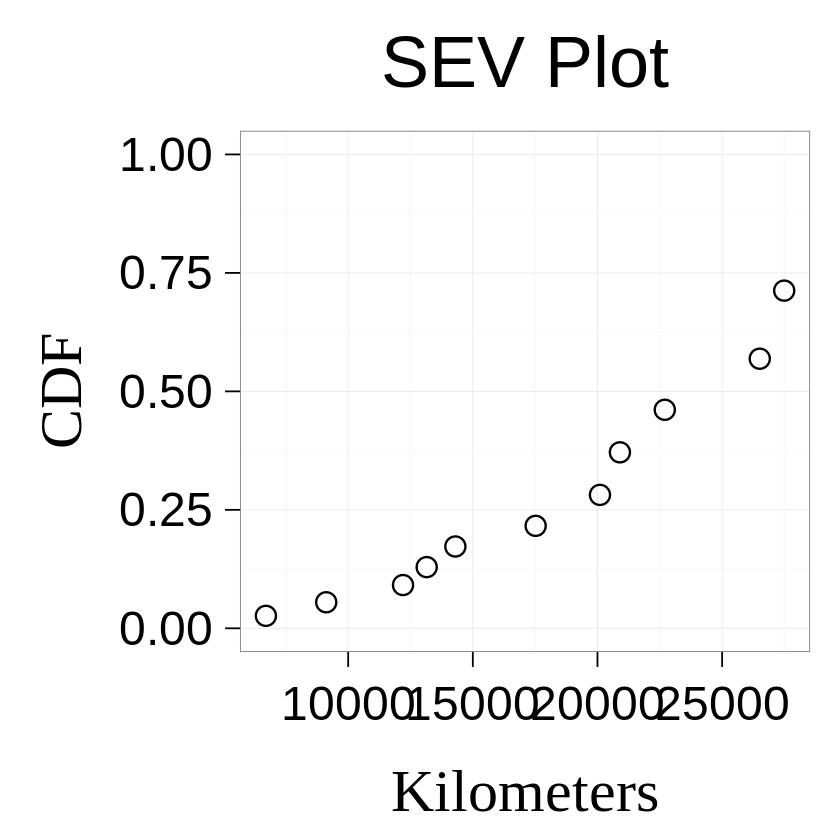

In [24]:
p.sev = pl + ggtitle("SEV Plot") ### write your answer ###
p.sev
# ggsave("shock_absorbers_pp_exponentialplot.pdf", p.exp, width=silver.w, height=silver.h)


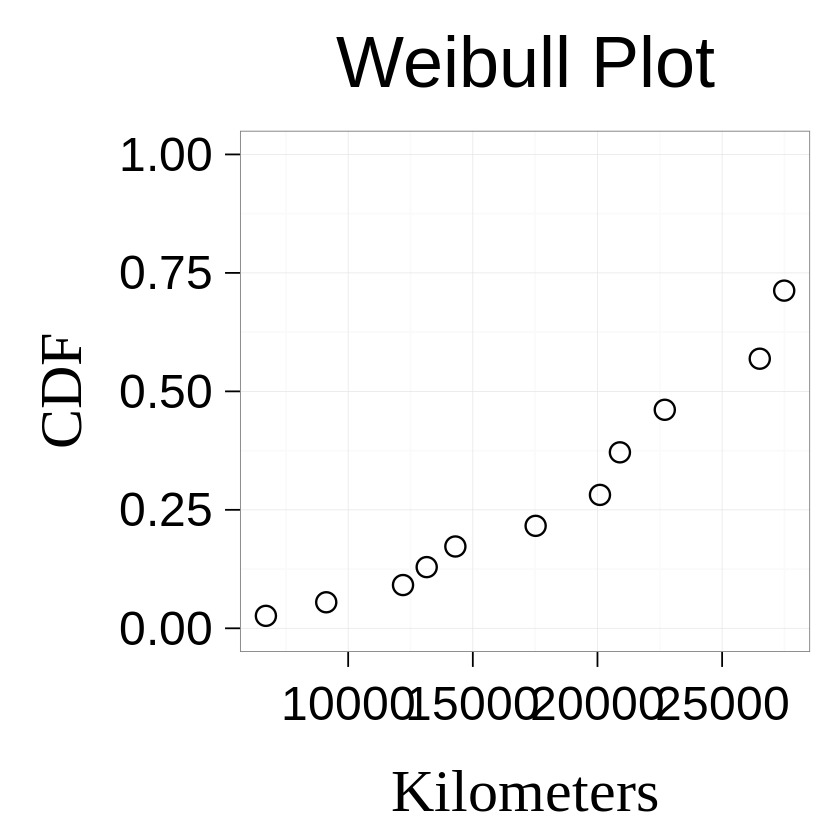

In [25]:
p.weibull = pl + ggtitle("Weibull Plot") ### write your answer ###
p.weibull
# ggsave("shock_absorbers_pp_weibullplot.pdf", p.weibull, width=silver.w, height=silver.h)


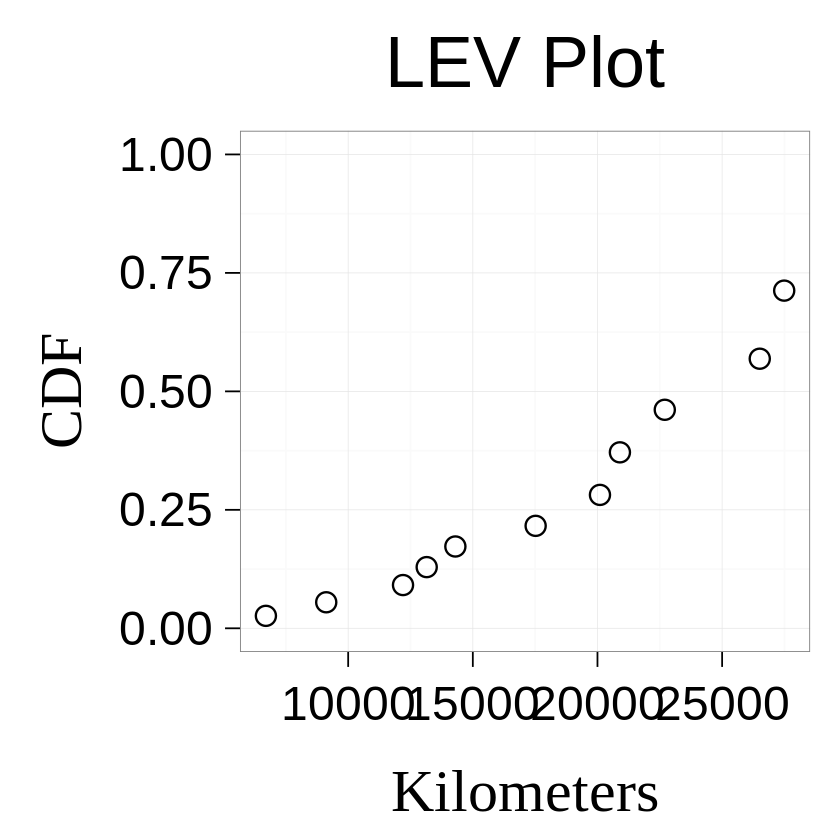

In [26]:
p.lev = pl + ggtitle("LEV Plot") ### write your answer ###
p.lev
# ggsave("shock_absorbers_pp_levplot.pdf", p.lev,  width=silver.w, height=silver.h)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



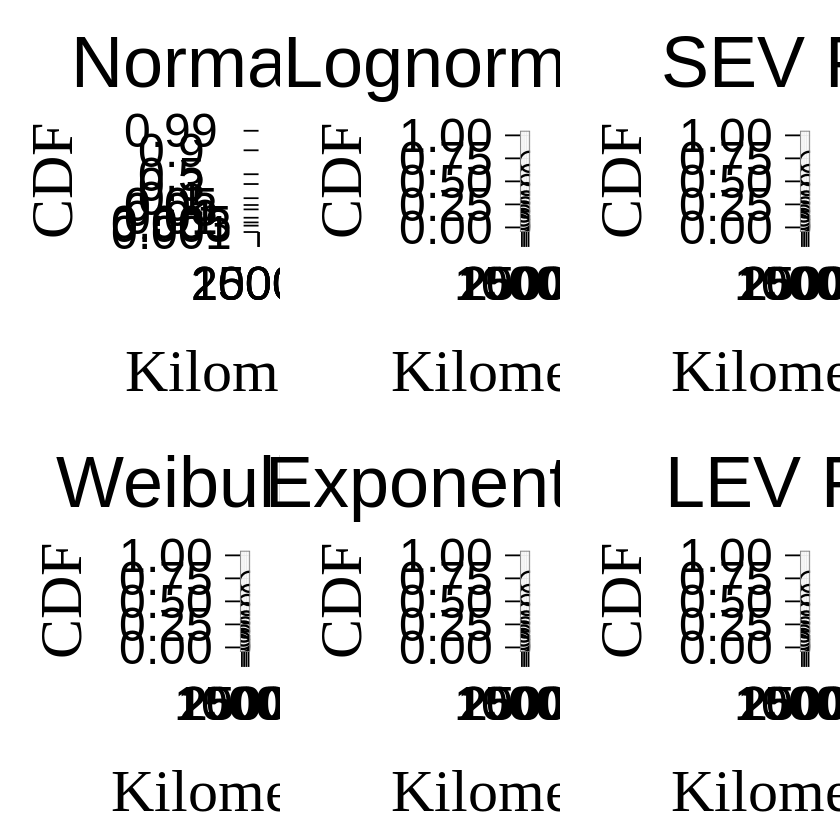

In [28]:
pla = gridExtra::grid.arrange(p.normal, p.lognormal, p.sev, p.weibull, p.exp, p.lev, ncol=3)
# ggsave("shock_absorbers_pp_all.pdf", pla,  width=silver.w*2, height=silver.h*2)